In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette('bright')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("Data/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.rename(columns={'medv':'price'}, inplace=True)
# Summarize the stats of the data
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exploratory Data Analysis

In [5]:
df.dropna(axis=0, inplace=True)

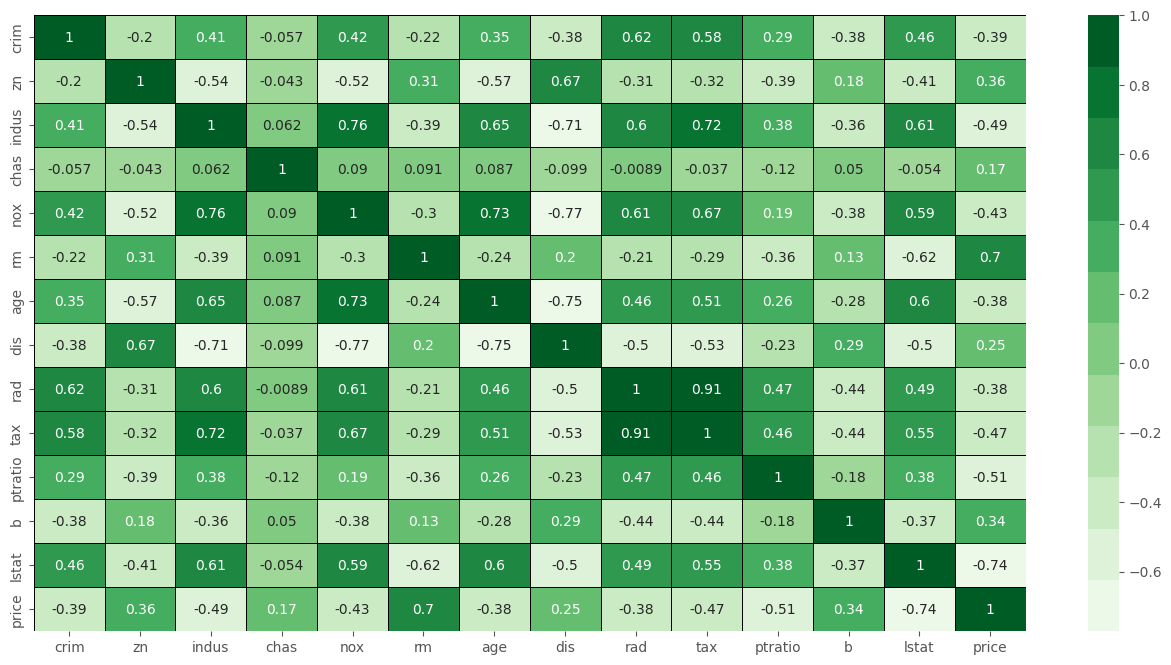

In [6]:
# Correlation
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='black', cmap=sns.color_palette("Greens",12))
plt.show()
# sns.pairplot(df)
# plt.show()

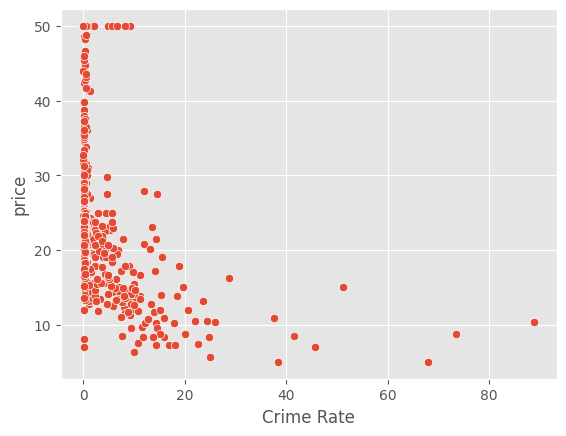

In [7]:
sns.scatterplot(x=df['crim'], y=df['price'])
plt.xlabel('Crime Rate')
plt.show()
# Negative Correlation between Crime rate and Price

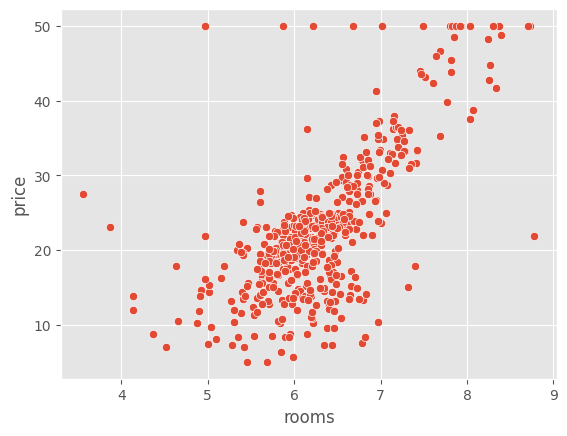

In [8]:
sns.scatterplot(x=df['rm'], y=df['price'])
plt.xlabel('rooms')
plt.show()
# Positve Correlation between Crime rate and Price

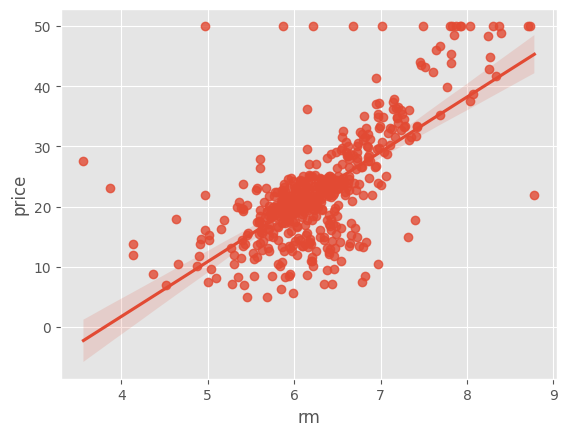

In [9]:
sns.regplot(data=df, x='rm', y='price')
plt.show()

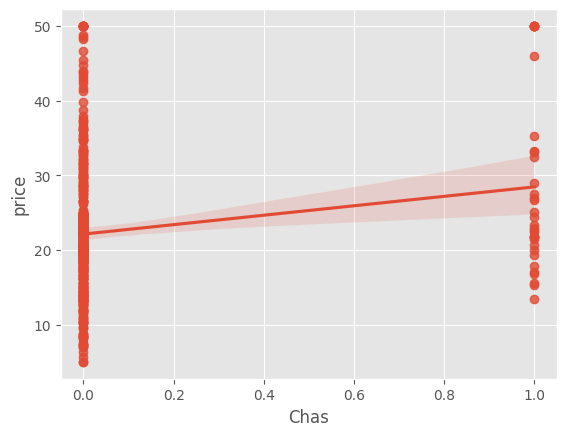

In [10]:
sns.regplot(x=df['chas'], y=df['price'])
plt.xlabel('Chas')
plt.show()
# No relation

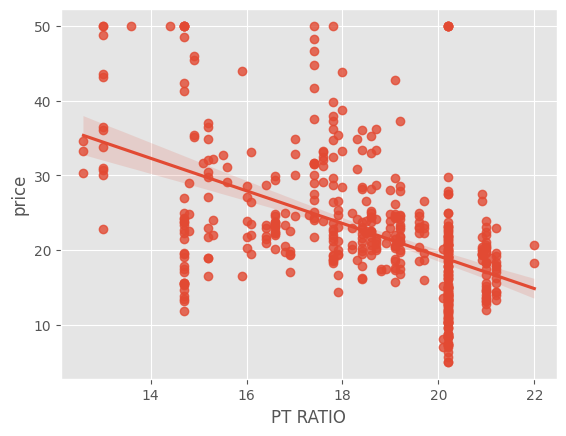

In [11]:
sns.regplot(x=df['ptratio'], y=df['price'])
plt.xlabel('PT RATIO')
plt.show()
# Negative relation

In [12]:
X = df.drop('price', axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((400, 13), (101, 13))

In [13]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [48]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

regression_model.fit(X_train_scaled, y_train)

# Print the coefficients and Intercept
print("- Feature Coeficients:\n ", regression_model.coef_)
print("\n- Intercept:", regression_model.intercept_)
print("\n- Params on which the model was trained:", regression_model.get_params())

- Feature Coeficients:
  [-0.77069915  1.03071461  0.27913167  0.56447864 -1.68029622  2.82276603
  0.27220188 -2.88770879  2.54815414 -2.03833449 -1.89508943  1.13266888
 -4.2357555 ]

- Intercept: 22.90349999999999

- Params on which the model was trained: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [49]:
# Prediction with test data
prediction = regression_model.predict(X_test_scaled)

### ASSUMPTIONS

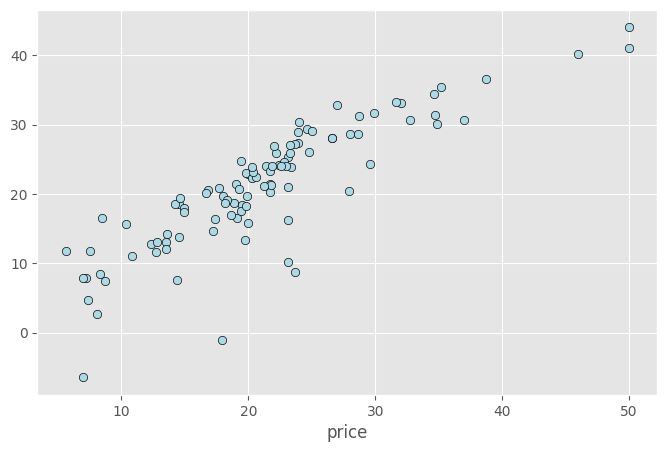

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=prediction, color='lightblue', edgecolor='black')
plt.show()

### Residuals

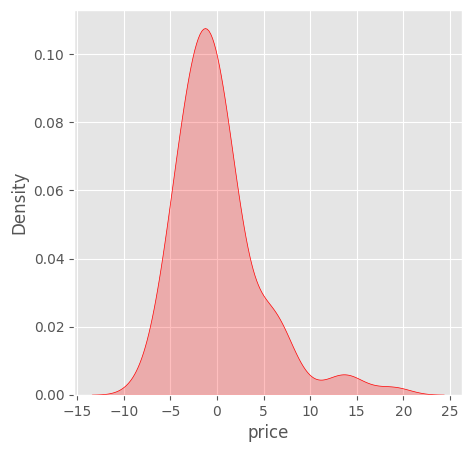

In [17]:
residuals = y_test - prediction
plt.figure(figsize=(5, 5))
sns.kdeplot(residuals, fill=True, color='red')
plt.show()

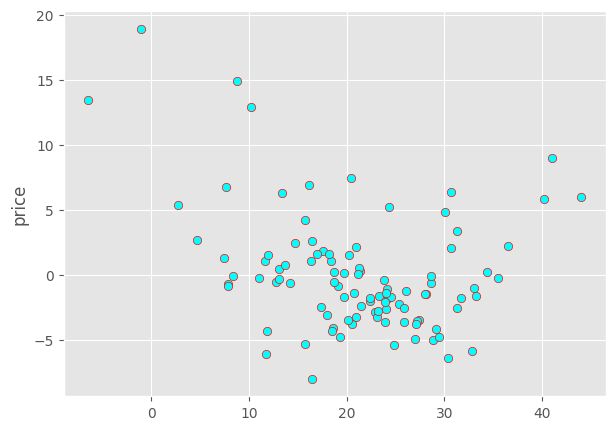

In [18]:
# Scatter plot for Homoscedasticity (Uniform Distribution)
plt.figure(figsize=(7, 5))
sns.scatterplot(y=residuals, x=prediction, color='cyan', edgecolor='red')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
rmse = np.sqrt(mse)

print(f"MSE: {mse}\nRMSE: {rmse}\nMAE: {mae}")

MSE: 20.68772047304852
RMSE: 4.548375586189922
MAE: 3.2428569148107047


### R-square & Adjusted R-square

**Formula = 1 - SSR/SST**

Here,
- SSR: Sum of Squares of Residuals
- SST: Total Sum if Squares

In [20]:
from sklearn.metrics import r2_score
score = r2_score(y_test, prediction)
print("R2_score:", score)

R2_score: 0.7200277678580311


**Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**

Here,
- R2: R2_score
- k: the number of observations
- n: the number of predictor variables

In [21]:
# There is no actual formula for adjusted r2
adjusted_r2 = 1 - ((1 - score) * (len(y_test) -1) / (len(y_test) - X_test.shape[1] - 1))
print("Adjusted R2:", adjusted_r2)

Adjusted R2: 0.6781928366184267


### New Data Prediction

In [46]:
X[:1]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


In [50]:
# Transformation of new data
point = scaler.transform(X[:1])
regression_model.predict(point)

array([30.41900005])

## Pickling the Model file for Deployment

In [51]:
import pickle

In [52]:
pickle.dump(regression_model, open("regmodel.pkl", "wb"))

In [53]:
# When you create your Pickle file, you can save and load anywhere you want
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [54]:
pickled_model.predict(point)

array([30.41900005])